# **Hpothesis Testing**

# **Imports**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly


#Scipy
from scipy import stats
from scipy.stats import norm, pearsonr
import statsmodels.api as sm

# Warnings 
import warnings 
warnings.filterwarnings("ignore")

# **Loading The Data**

In [2]:
# Loading the NYC Restaurant Data 
rd = pd.read_csv('rd')

In [3]:
# Loading the Yelp Data for NYC Restaurant Data 
ydf = pd.read_csv('ydf')

In [4]:
# Restaurant Inspection data Check 
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210611 entries, 0 to 210610
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  210611 non-null  int64  
 1   DBA                    209970 non-null  object 
 2   BORO                   210611 non-null  object 
 3   BUILDING               210308 non-null  object 
 4   STREET                 210607 non-null  object 
 5   ZIPCODE                207890 non-null  float64
 6   CUISINE DESCRIPTION    208186 non-null  object 
 7   INSPECTION DATE        210611 non-null  object 
 8   ACTION                 208186 non-null  object 
 9   VIOLATION CODE         207055 non-null  object 
 10  VIOLATION DESCRIPTION  207055 non-null  object 
 11  CRITICAL FLAG          210611 non-null  object 
 12  SCORE                  200542 non-null  float64
 13  GRADE                  103135 non-null  object 
 14  GRADE DATE             94324 non-nul

In [5]:
ydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   alias         848 non-null    object 
 1   name          848 non-null    object 
 2   image_url     848 non-null    object 
 3   url           848 non-null    object 
 4   review_count  848 non-null    int64  
 5   categories    848 non-null    object 
 6   rating        848 non-null    float64
 7   coordinates   848 non-null    object 
 8   transactions  848 non-null    object 
 9   location      848 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 66.4+ KB


# **Selecting Subset of Pizza Restaurants in Brooklyn**

In [6]:
# Selecting subset of only restaurants from Brooklyn
brooklyndf = rd[rd['BORO'].str.lower()=='brooklyn']

In [7]:
# Selecting subset of only restaurants in Brooklyn that have pizza in the cuisine description 
pizza_brooklyn_subset = brooklyndf[(brooklyndf['CUISINE DESCRIPTION'].str.lower()=='pizza')]

In [8]:
# Filtering out rows with NAN in the 'GRADE' column
pizza_brooklyn_subset = pizza_brooklyn_subset.dropna(subset=['GRADE'])

In [9]:
# Take a look at Brooklyn pizza restaurants in inspection data
print(pizza_brooklyn_subset)

           CAMIS                                  DBA      BORO BUILDING  \
115     50011046               LA BELLA PIZZA EXPRESS  Brooklyn     2178   
722     50095131                             DOMINO'S  Brooklyn     2196   
829     41459621  GINO'S BRICK OVEN PIZZA & TRATTORIA  Brooklyn   548550   
981     50067979                       TONY PEPPERONI  Brooklyn     7502   
1087    50134916                           ROMA PIZZA  Brooklyn     1101   
...          ...                                  ...       ...      ...   
210290  41393052                            IGNAZIO'S  Brooklyn        4   
210311  50105343                       PROSPECT PIZZA  Brooklyn      599   
210325  50062985           SHIPWRECKED MINIATURE GOLF  Brooklyn      619   
210459  50089510                         ROSA'S PIZZA  Brooklyn      374   
210585  50001675       GINO'S CUCINA BRICK OVEN PIZZA  Brooklyn      723   

                     STREET  ZIPCODE CUISINE DESCRIPTION INSPECTION DATE  \
115        

# **Merging Yelp Data with Inspections Data**

In [10]:
# Making the names of the restaurants in both data sets compatable for the merge 
column_name = 'name'
# Matching up the names for both datasets
ydf['name'] = ydf['name'].apply(lambda x: str(x).upper())

In [11]:
# Merging the two data sets on the names of the resaurants 
mdf = pd.merge(pizza_brooklyn_subset, ydf,left_on='DBA', right_on='name', how='inner', indicator=True)

# Dropping any Duplicate rows 
mdf.drop_duplicates (inplace=True)

#Display the merged dataframe
print ("\nMerged DataFrame:")
print(mdf)


Merged DataFrame:
        CAMIS                                  DBA      BORO BUILDING  \
0    41459621  GINO'S BRICK OVEN PIZZA & TRATTORIA  Brooklyn   548550   
1    41459621  GINO'S BRICK OVEN PIZZA & TRATTORIA  Brooklyn   548550   
2    41459621  GINO'S BRICK OVEN PIZZA & TRATTORIA  Brooklyn   548550   
3    41459621  GINO'S BRICK OVEN PIZZA & TRATTORIA  Brooklyn   548550   
4    50134916                           ROMA PIZZA  Brooklyn     1101   
..        ...                                  ...       ...      ...   
515  41393052                            IGNAZIO'S  Brooklyn        4   
516  41393052                            IGNAZIO'S  Brooklyn        4   
517  41393052                            IGNAZIO'S  Brooklyn        4   
518  41393052                            IGNAZIO'S  Brooklyn        4   
519  50000967                              WHEATED  Brooklyn      905   

              STREET  ZIPCODE CUISINE DESCRIPTION INSPECTION DATE  \
0    FLATBUSH AVENUE      NaN      

In [12]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CAMIS                  520 non-null    int64   
 1   DBA                    520 non-null    object  
 2   BORO                   520 non-null    object  
 3   BUILDING               520 non-null    object  
 4   STREET                 520 non-null    object  
 5   ZIPCODE                516 non-null    float64 
 6   CUISINE DESCRIPTION    520 non-null    object  
 7   INSPECTION DATE        520 non-null    object  
 8   ACTION                 520 non-null    object  
 9   VIOLATION CODE         518 non-null    object  
 10  VIOLATION DESCRIPTION  518 non-null    object  
 11  CRITICAL FLAG          520 non-null    object  
 12  SCORE                  520 non-null    float64 
 13  GRADE                  520 non-null    object  
 14  GRADE DATE             513 non-null    obj

# **Data Cleaning**

In [13]:
# Creating a new column 'unique_id' by combining 'name' and 'CAMIS'
mdf['unique_id'] = mdf['name'] + '_' + mdf['CAMIS'].astype(str)

# Sorting the DataFrame based on the new 'unique_id' column
mdf = mdf.sort_values(by='unique_id')

# If you want to keep only the last occurrence of each unique identifier, you can use the following:
mdf = mdf.sort_values(by='INSPECTION DATE').drop_duplicates(subset=['unique_id'], keep='last')

In [14]:
# Dropping irrelevant columns
mdf.drop(['_merge', 'GRADE', 'BUILDING', 'ZIPCODE', 'Council District', 'Longitude', 'Latitude', 'coordinates', 'url','CRITICAL FLAG', 'alias', 'categories'], axis=1, inplace=True)

In [15]:
# checking missing data in data 
def check_missing_data(rdf):
    total = mdf.isnull().sum().sort_values(ascending = False)
    percent = (mdf.isnull().sum()/mdf.isnull().count()*100).sort_values(ascending = False)
    percent = percent.round(2).astype(str) + '%'
    missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data_result = check_missing_data(mdf)
missing_data_result.head()

,Total,Percent
GRADE DATE,2,2.5%
CAMIS,0,0.0%
location,0,0.0%
transactions,0,0.0%
rating,0,0.0%


In [16]:
# Function to eliminate rows with missing Grade dates
def eliminate_missing_grade_date_rows(mdf):
    """
    Eliminate rows with missing data in the "GRADE DATE" column.

    Returns:
    - Cleaned DataFrame without rows with missing "GRADE DATE"
    """
    # Drop rows with missing values in the "GRADE DATE" column
    cleaned_dataframe = mdf.dropna(subset=["GRADE DATE"])

    return cleaned_dataframe

mdf = eliminate_missing_grade_date_rows(mdf)

In [17]:
# Filtering out only the initial inspections and re-inspections
def filter_inspection_type(mdf):
    """
    Filter rows based on the values in the "INSPECTION TYPE" column.

    Returns:
    - DataFrame containing only rows with specified inspection types
    """
    inspection_types_to_keep = ['Cycle Inspection / Initial Inspection', 'Cycle Inspection / Re-inspection']
    filtered_rdf = mdf.loc[merged_df['INSPECTION TYPE'].isin(inspection_types_to_keep)]

    return filtered_rdf

In [18]:
#create a dataframe with the most recent inspection data
mdf = mdf.sort_values(by='INSPECTION DATE').drop_duplicates(subset=['CAMIS'], keep='last')

In [19]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 314 to 448
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CAMIS                  78 non-null     int64  
 1   DBA                    78 non-null     object 
 2   BORO                   78 non-null     object 
 3   STREET                 78 non-null     object 
 4   CUISINE DESCRIPTION    78 non-null     object 
 5   INSPECTION DATE        78 non-null     object 
 6   ACTION                 78 non-null     object 
 7   VIOLATION CODE         78 non-null     object 
 8   VIOLATION DESCRIPTION  78 non-null     object 
 9   SCORE                  78 non-null     float64
 10  GRADE DATE             78 non-null     object 
 11  INSPECTION TYPE        78 non-null     object 
 12  name                   78 non-null     object 
 13  image_url              78 non-null     object 
 14  review_count           78 non-null     int64  
 15  rating    

In [20]:
mdf.describe()

,CAMIS,SCORE,review_count,rating
count,7.800000e+01,78.000000,78.000000,78.000000
mean,4.662822e+07,11.987179,315.500000,3.775641
std,4.404961e+06,8.449227,602.204106,0.579114
min,4.038630e+07,2.000000,22.000000,1.500000
25%,4.139588e+07,8.250000,71.500000,3.500000
50%,5.005609e+07,12.000000,183.000000,4.000000
75%,5.009229e+07,13.000000,303.000000,4.000000
max,5.014129e+07,64.000000,4219.000000,5.000000


In [21]:
mdf.head()

,CAMIS,DBA,BORO,STREET,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,SCORE,GRADE DATE,INSPECTION TYPE,name,image_url,review_count,rating,transactions,location,unique_id
314,50084972,JOE'S PIZZA,Brooklyn,5 AVENUE,Pizza,01/03/2023,Violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,18.0,01/03/2023,Cycle Inspection / Re-inspection,JOE'S PIZZA,https://s3-media4.fl.yelpcdn.com/bphoto/sUjegc...,517,4.0,"['delivery', 'pickup']","{'address1': '124 Fulton St', 'address2': '', ...",JOE'S PIZZA_50084972
16,41702359,TONY'S PIZZA,Brooklyn,KNICKERBOCKER AVENUE,Pizza,01/11/2023,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,9.0,01/11/2023,Cycle Inspection / Re-inspection,TONY'S PIZZA,https://s3-media4.fl.yelpcdn.com/bphoto/VaE2Ry...,183,3.5,"['pickup', 'delivery']","{'address1': '355 Graham Ave', 'address2': '',...",TONY'S PIZZA_41702359
392,50001003,FORNINO,Brooklyn,MANHATTAN AVENUE,Pizza,01/15/2023,Violations were cited in the following area(s).,02G,Cold TCS food item held above 41 °F; smoked or...,27.0,01/15/2023,Cycle Inspection / Re-inspection,FORNINO,https://s3-media2.fl.yelpcdn.com/bphoto/TabOPQ...,303,3.5,[],"{'address1': 'Pier 6 Brooklyn Bridge Park', 'a...",FORNINO_50001003
229,50085693,JOE'S PIZZA OF PARK SLOPE,Brooklyn,5 AVENUE,Pizza,01/24/2023,Violations were cited in the following area(s).,04A,Food Protection Certificate (FPC) not held by ...,37.0,01/24/2023,Cycle Inspection / Re-inspection,JOE'S PIZZA OF PARK SLOPE,https://s3-media3.fl.yelpcdn.com/bphoto/rvZE8N...,40,2.0,"['pickup', 'delivery']","{'address1': '349 5th Ave', 'address2': '', 'a...",JOE'S PIZZA OF PARK SLOPE_50085693
519,50000967,WHEATED,Brooklyn,CHURCH AVENUE,Pizza,02/23/2023,Violations were cited in the following area(s).,06B,"Tobacco or electronic cigarette use, eating, o...",5.0,02/23/2023,Cycle Inspection / Re-inspection,WHEATED,https://s3-media1.fl.yelpcdn.com/bphoto/nGlPNp...,398,4.5,['delivery'],"{'address1': '905 Church Ave', 'address2': '',...",WHEATED_50000967


# **Hypothesis Test 1**

**Try to find a correlation between scores on inspections and the ratings on Yelp**


 - The null hypothesis for this question would be that the restaurant inspection score and review count does not significantly affect the rating reviews on Yelp for pizza restaurants in Brooklyn NY.
 
  - The alternative hypothesis for this question would be that the restaurant inspection score and review count does affect the rating reviews on Yelp for the pizza restaurants in Brooklyn NY. 

In [22]:
# Perform Pearson correlation test 
correlation, p_value = pearsonr(mdf['SCORE'], mdf['review_count'])

# Print results
print(f'Correlation: {correlation:.2f}')
print(f'P-value: {p_value:.4f}')

# Check for significance based on the p-value
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('There is no significant correlation.')

Correlation: 0.17
P-value: 0.1346
There is no significant correlation.


In [23]:
# Select the columns of interest
selected_columns = ['SCORE', 'review_count']
subset_df = mdf[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Print or display the correlation matrix
print(correlation_matrix)

                 SCORE  review_count
SCORE         1.000000      0.170915
review_count  0.170915      1.000000


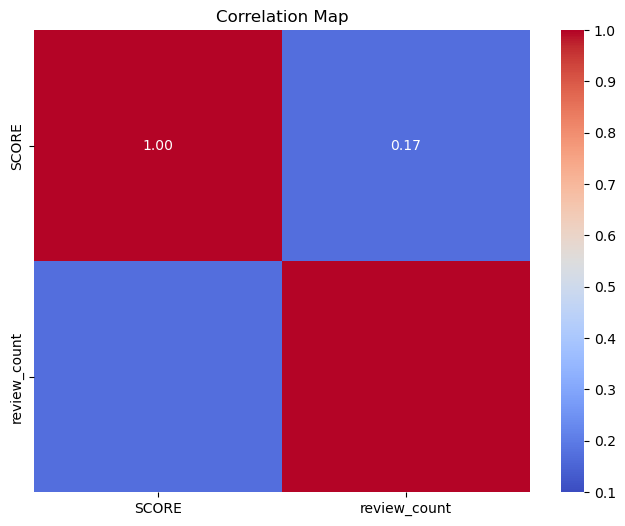

In [24]:
numeric_columns = ['SCORE', 'review_count']

mdf_numeric = mdf[numeric_columns].apply(pd.to_numeric, errors='coerce').dropna()

c_matrix = mdf_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=.1, vmax=1)
plt.title('Correlation Map')
plt.show()

- It seems like the correlation between SCORE and review_count is relatively low (0.17), and therefore it is not visually prominent on the heatmap.

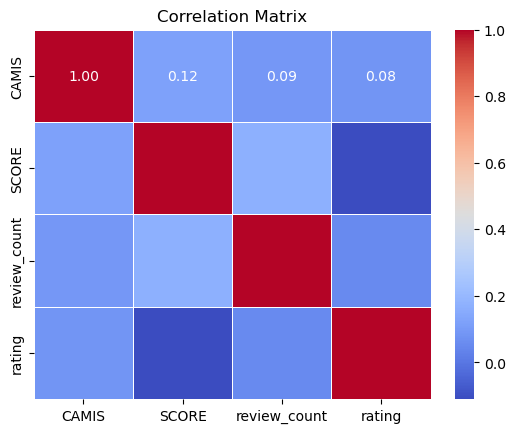

In [25]:
# Assuming 'restaurant_name' is a non-numeric column
numeric_data = mdf.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# **Visualizations**

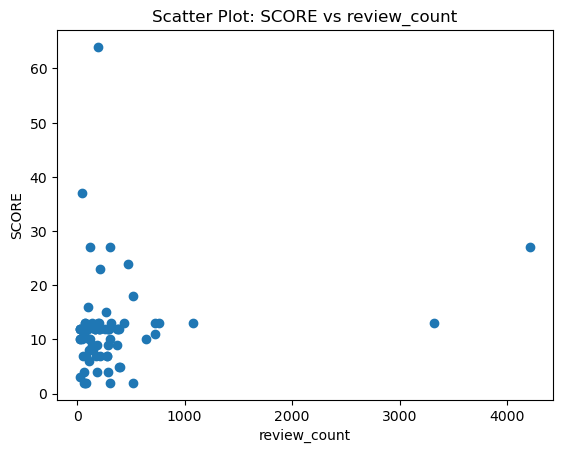

In [26]:
plt.scatter(mdf_numeric['review_count'], mdf_numeric['SCORE'])
plt.xlabel('review_count')
plt.ylabel('SCORE')
plt.title('Scatter Plot: SCORE vs review_count')
plt.show()

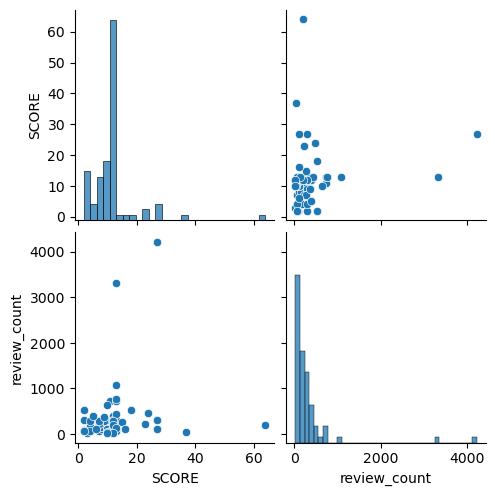

In [27]:
sns.pairplot(mdf_numeric)
plt.show()

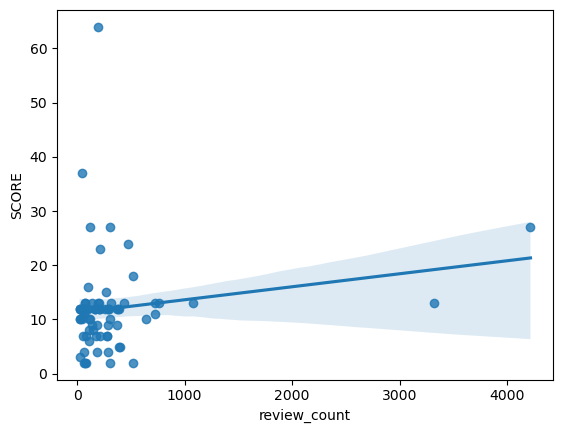

In [28]:
sns.regplot(x='review_count', y='SCORE', data=mdf_numeric)
plt.show()

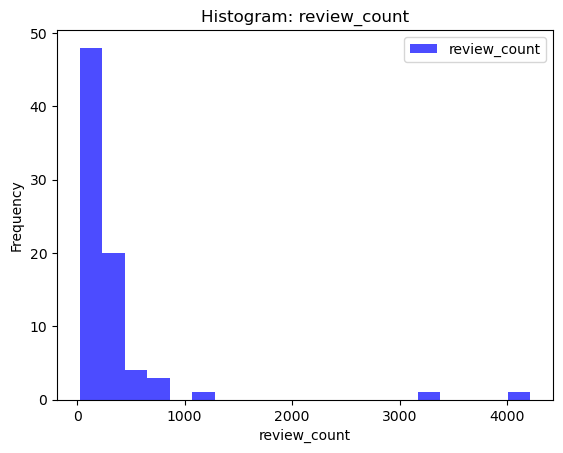

In [29]:
plt.hist(mdf_numeric['review_count'], bins=20, color='blue', alpha=0.7, label='review_count')
plt.xlabel('review_count')
plt.ylabel('Frequency')
plt.title('Histogram: review_count')
plt.legend()
plt.show()

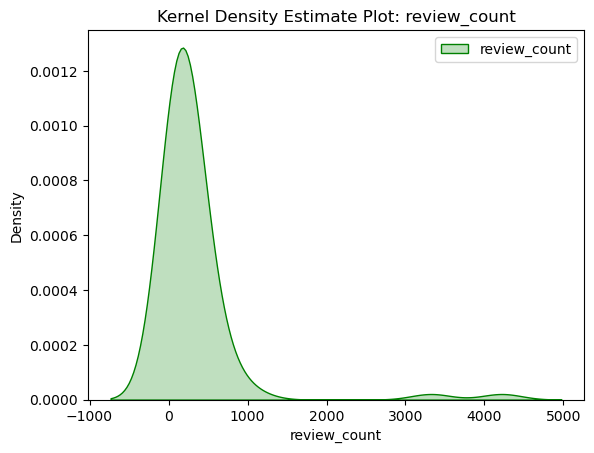

In [30]:
sns.kdeplot(mdf_numeric['review_count'], shade=True, color='green', label='review_count')
plt.xlabel('review_count')
plt.ylabel('Density')
plt.title('Kernel Density Estimate Plot: review_count')
plt.legend()
plt.show()

In [31]:
# Filtering out the restaurants with more review counts and better scores
df_filtered = mdf[(mdf['review_count'] >= 200)]

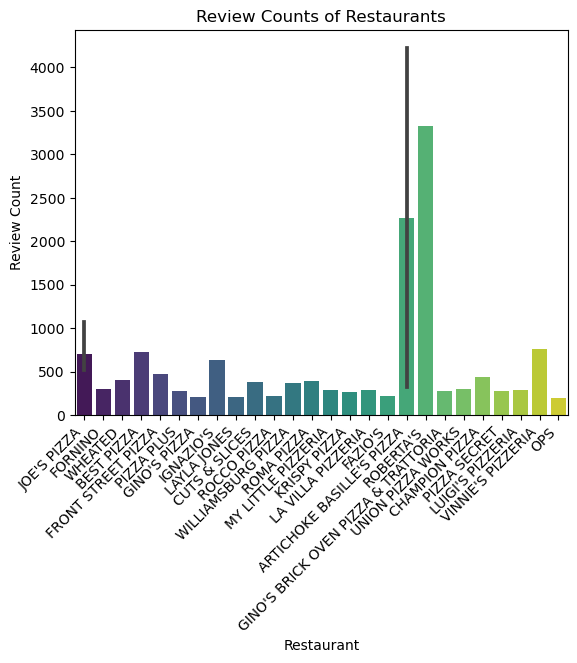

In [32]:
# Bar plot for review counts
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='name', y='review_count', data=df_filtered, palette='viridis')
plt.title('Review Counts of Restaurants')
plt.xlabel('Restaurant')
plt.ylabel('Review Count')
plt.xticks(rotation=45, ha='right');

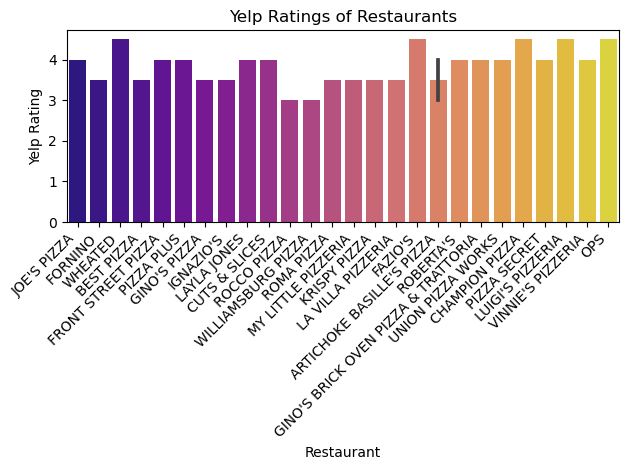

In [33]:
# Bar plot for Yelp ratings
plt.subplot(1, 1, 1)
sns.barplot(x='name', y='rating', data=df_filtered, palette='plasma')
plt.title('Yelp Ratings of Restaurants')
plt.xlabel('Restaurant')
plt.ylabel('Yelp Rating')
plt.xticks(rotation=45, ha='right')
# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()